# Lab 1. 在OpenAI上實作Q-Learning
歡迎大家來到增強式學習的世界！接下來，我們要利用OpenAI Gym這個套件，來實作以及驗證我們的演算法。

在此處，因為我們使用的是Google CoLab，為了能夠方便在這個環境上面顯示，我們先安裝一些必要的套件。

In [0]:
!apt-get install -y xvfb python-opengl xdpyinfo > /dev/null 2>&1
!pip install gym pyvirtualdisplay xdpyinfo> /dev/null 2>&1

接著，我們產生一個Display的物件，並且設定在Google CoLab上的顯示參數。

In [25]:
from IPython import display as ipythondisplay

from pyvirtualdisplay import Display
display = Display(visible=0, size=(1024, 768))
display.start()

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1024x768x24', ':1021'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1024x768x24', ':1021'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

設定完了顯示方式之後，我們就可以開始準備進入OepnAI Gym的世界了！OpenAI Gym 是一個提供許多測試環境的工具，讓大家有一個共同的環境可以測試自己的 RL 演算法，而不用花時間去搭建自己的測試環境。

首先先引入必要的函式庫。主要的是gym，numpy和matplotlib分別用來做數學運算以及畫圖表的。

In [0]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# 設定環境開始

我們從一個最簡單的環境：CartPole開始。這是一個維持平衡棒子的遊戲。是一個增強學習中最知名的問題了。

基本上，OpenAI Gym 提供了許許多多的環境，你可以在OpenAI的網站 ( https://gym.openai.com/envs/ )找到更多環境。

在我們執行這個環境之前，我們可以先參閱官方網站上面的敘述 (https://github.com/openai/gym/wiki/CartPole-v0)。


Total reward: 28.0


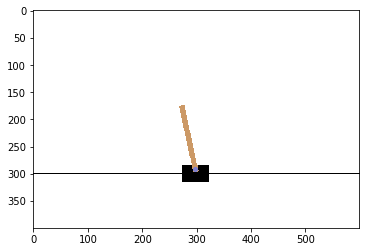

In [15]:
env = gym.make("CartPole-v0")
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

rewards=0
for t in range(50):
  #亂數選一個動作
  action = env.action_space.sample()
  obs, reward, done, info = env.step(action)
  print("reward:",reward,"done:",done)
  
  rewards+=reward
  #env.render()用來顯示結果
  screen = env.render(mode='rgb_array')
  #用matploblib畫出來
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())
    
  if done:
	  break  

ipythondisplay.clear_output(wait=True)
env.close()

print("Total reward:",rewards)

首先你可以注意到，我們在選擇action的時候是用亂數選。這樣的選擇，得到的分數是24.0分。我們要以能夠突破這個分數為目標前進！

# 環境狀態 (Observation)

在gym中，observation就是我們在課堂上提到的state，也就是指環境裡面的狀態。

在上面的程式中，我們可以看到env.step()提供環境狀態。env.step() 會回傳 4 個變數，分別是
1. observation (環境狀態)
2. reward (上一次 action 獲得的 reward )
3. done (判斷是否達到終止條件的變數)
4. info ( debug 用的資訊)

呼叫 reset，整個環境就會重頭開始，此外 reset 會回傳一個初始的環境狀態。



# Space

在前面的程式中，每次執行的(action)都是環境空間中隨機挑出的。
在 Gym 的環境中，有兩種空間：action_space 和observation_space。如果我們看一下類型的話，兩者都屬於Space類型，用來描述有效的動作還有環境的格式和範圍。

我們可以用以下的程式來看看到底有幾個action可以用，環境裡面又有幾個狀態：

In [16]:
import gym
env = gym.make('CartPole-v0')

print(env.action_space)

print(env.observation_space)
print(env.observation_space.high)
print(env.observation_space.low)
env.close()

Discrete(2)
Box(4,)
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


基本上，我們可以看到action_space 是一個Discrete類別的物件，他是一個{0,1,...,n-1}的非負整數的集合。在 CartPole-v0 例子中，動作空間為 {0,1}，代表往左往右。observation_space 則是一個Box類型的物件，用來表示一个 n 维的盒子，所以在上面我們會發現 observation 是一個長度4的數組，每個數組都有上下界（看起來就像一個盒子一般)。

再次提醒，如果需要知道詳細的action以及observation所代表的意義請查這邊：https://github.com/openai/gym/wiki/CartPole-v0


# 惡搞一下
我們來試試看讓車子只往一邊跑

Total reward: 10.0


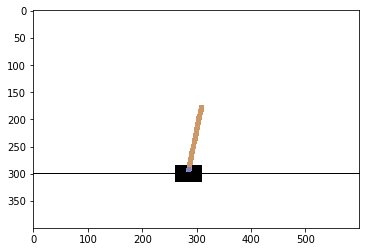

In [19]:
import gym
from gym import spaces
  
env = gym.make('CartPole-v0')
env.action_space = spaces.Discrete(1) # Set it to only 1 elements {0}
  
observation = env.reset()
#用來在colab上畫圖的指令
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

rewards = 0
for t in range(20):
  screen = env.render(mode='rgb_array')
  action = env.action_space.sample()
  observation, reward, done, info = env.step(action)
    
  rewards+=reward  
  
  #用matploblib畫出來
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())
  
  if done==True:
    break
      
ipythondisplay.clear_output(wait=True)
env.close()
print("Total reward:",rewards)

惡搞成功，如果一直讓滑車往左的話，一下子遊戲就停掉了。才得9分。

# 來個工人智慧

為了讓agent不會走得太無腦，再來引進一個簡單的策略：如果柱子向左傾（角度 < 0），則小車左移以維持平衡，否則右移。

In [0]:
# 定義 policy
def choose_action(observation):
    pos, v, ang, rot = observation
    return 0 if ang < 0 else 1 # 柱子左傾則小車左移，否則右移 


定義完了policy，我們將policy放入我們的程式中：

In [21]:
env = gym.make('CartPole-v0')

for i_episode in range(200):
    observation = env.reset()
    rewards = 0
    for t in range(250):
        #env.render()

        action = choose_action(observation)
        observation, reward, done, info = env.step(action)

        rewards += reward

        if done:
            print('Episode finished after {} timesteps, total rewards {}'.format(t+1, rewards))
            break

env.close()

Episode finished after 37 timesteps, total rewards 37.0
Episode finished after 38 timesteps, total rewards 38.0
Episode finished after 52 timesteps, total rewards 52.0
Episode finished after 46 timesteps, total rewards 46.0
Episode finished after 42 timesteps, total rewards 42.0
Episode finished after 39 timesteps, total rewards 39.0
Episode finished after 47 timesteps, total rewards 47.0
Episode finished after 41 timesteps, total rewards 41.0
Episode finished after 58 timesteps, total rewards 58.0
Episode finished after 26 timesteps, total rewards 26.0
Episode finished after 53 timesteps, total rewards 53.0
Episode finished after 35 timesteps, total rewards 35.0
Episode finished after 39 timesteps, total rewards 39.0
Episode finished after 32 timesteps, total rewards 32.0
Episode finished after 40 timesteps, total rewards 40.0
Episode finished after 31 timesteps, total rewards 31.0
Episode finished after 49 timesteps, total rewards 49.0
Episode finished after 45 timesteps, total rewar

# 利用Q-Learning

先統整一下。我們的目標是學習到最佳 Q function，過程中以 ε-greedy 方法與 environment 互動，從中獲得 reward 以更新 Q table 裡的 Q value。先看一下基於 ε-greedy 的 policy 定義：

In [0]:
def choose_action(state, q_table, action_space, epsilon):
    if np.random.random_sample() < epsilon: # 有 ε 的機率會選擇隨機 action
        return action_space.sample() 
    else: # 其他時間根據現有 policy 選擇 action，也就是在 Q table 裡目前 state 中，選擇擁有最大 Q value 的 action
        return np.argmax(q_table[state]) 


再來是 state 的表示。在 CartPole 環境裡觀察到的 feature 都是連續值，不適合作為一個 table 的 index，因此要將一個區間一個區間的值包在一起用離散數值表示，也就是下面的 bucket：

In [0]:
def get_state(observation, n_buckets, state_bounds):
    state = [0] * len(observation) 
    for i, s in enumerate(observation): # 每個 feature 有不同的分配
        l, u = state_bounds[i][0], state_bounds[i][1] # 每個 feature 值的範圍上下限
        if s <= l: # 低於下限，分配為 0
            state[i] = 0
        elif s >= u: # 高於上限，分配為最大值
            state[i] = n_buckets[i] - 1
        else: # 範圍內，依比例分配
            state[i] = int(((s - l) / (u - l)) * n_buckets[i])

    return tuple(state)


最後是學習。學習過程中為了方便收斂，一些參數像 ε 和 learning rate 會隨著時間遞減，也就是我們從大膽亂走，到越來越相信已經學到的經驗。

In [24]:
import math

env = gym.make('CartPole-v0')

# 準備 Q table
## Environment 中各個 feature 的 bucket 分配數量
## 1 代表任何值皆表同一 state，也就是這個 feature 其實不重要
n_buckets = (1, 1, 6, 3)

## Action 數量 
n_actions = env.action_space.n

## State 範圍 
state_bounds = list(zip(env.observation_space.low, env.observation_space.high))
state_bounds[1] = [-0.5, 0.5]
state_bounds[3] = [-math.radians(50), math.radians(50)]

## Q table，每個 state-action pair 存一值 
q_table = np.zeros(n_buckets + (n_actions,))

# 一些學習過程中的參數
get_epsilon = lambda i: max(0.01, min(1, 1.0 - math.log10((i+1)/25)))  # epsilon-greedy; 隨時間遞減
get_lr = lambda i: max(0.01, min(0.5, 1.0 - math.log10((i+1)/25))) # learning rate; 隨時間遞減 
gamma = 0.99 # reward discount factor

# Q-learning
for i_episode in range(200):
    epsilon = get_epsilon(i_episode)
    lr = get_lr(i_episode)

    observation = env.reset()
    rewards = 0
    state = get_state(observation, n_buckets, state_bounds) # 將連續值轉成離散 
    for t in range(250):
        action = choose_action(state, q_table, env.action_space, epsilon)
        observation, reward, done, info = env.step(action)

        rewards += reward
        next_state = get_state(observation, n_buckets, state_bounds)

        # 更新 Q table
        q_next_max = np.amax(q_table[next_state]) # 進入下一個 state 後，預期得到最大總 reward
        q_table[state + (action,)] += lr * (reward + gamma * q_next_max - q_table[state + (action,)]) # 就是那個公式

        # 前進下一 state 
        state = next_state

        if done:
            print('Episode finished after {} timesteps, total rewards {}'.format(t+1, rewards))
            break

env.close()


Episode finished after 20 timesteps, total rewards 20.0
Episode finished after 48 timesteps, total rewards 48.0
Episode finished after 25 timesteps, total rewards 25.0
Episode finished after 37 timesteps, total rewards 37.0
Episode finished after 13 timesteps, total rewards 13.0
Episode finished after 15 timesteps, total rewards 15.0
Episode finished after 52 timesteps, total rewards 52.0
Episode finished after 21 timesteps, total rewards 21.0
Episode finished after 32 timesteps, total rewards 32.0
Episode finished after 32 timesteps, total rewards 32.0
Episode finished after 22 timesteps, total rewards 22.0
Episode finished after 16 timesteps, total rewards 16.0
Episode finished after 24 timesteps, total rewards 24.0
Episode finished after 39 timesteps, total rewards 39.0
Episode finished after 22 timesteps, total rewards 22.0
Episode finished after 11 timesteps, total rewards 11.0
Episode finished after 14 timesteps, total rewards 14.0
Episode finished after 16 timesteps, total rewar

可以看到在訓練後期，agent 已經學會如何最大化自己的 reward，也就是維持住小車上的棒子了。

這邊有幾個Magic number，包括如何分bucket (哪些feature是重要的)、 state 的上下限、還有參數設定都是需要多試幾次來調整，來達到最好結果的。這邊為了展示給大家看，所以我就放上了前人試過的參數。大家也可以試試看自己從0到1的設定這些參數。

# Quiz 1: 
既然都求出Q-Table了，請完成一個程式畫出滑車如何利用Q-Table來保持平衡吧！